In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

''' inputs '''
T=3.0 # horizon length 
l1=1; l2=2; l=l1+l2 # average length of the vehicles in the j-th population [m]
rho1_jam=1.0; rho2_jam=0.5 # jam density [vehicles/m]
u1_max=1.0; u2_max=0.5 # free flow speed 
L_list=[2, 2, 6] # road length [m]
### l1*rho1_jam = l2*rho2_jam = L
CFL=0.75    # CFL<1
EPS=0.45    # EPS<0.5

## Initial CT density

In [14]:
Error_list=[]
Nx_list=[]
mu=0.0

""" solve in finer grid  """
print("******* solve in finer grid  ********")
def fname(text):
    npzfile = np.load(text)
    Nx = npzfile['Nx']
    Nt = npzfile['Nt']
    dx = npzfile['dx']
    dt = npzfile['dt']
    mu=npzfile['mu']
    """ Solutions """
    rho1_mfg=npzfile['s_rho1']
    u1_mfg=npzfile['s_u1']
    V1_mfg=npzfile['s_V1']
    Q1_mfg=npzfile['s_Q1']
    rho2_mfg=npzfile['s_rho2']
    u2_mfg=npzfile['s_u2']
    V2_mfg=npzfile['s_V2']
    Q2_mfg=npzfile['s_Q2']
    x_mfg=npzfile['x_points'][:-1]
    t_mfg=npzfile['t_points']
    y_mfg=np.zeros(len(x_mfg))
    for i in range(1,len(x_mfg)):
        y_mfg[i]=(x_mfg[i-1]+x_mfg[i])/2
    fnames=[x_mfg,y_mfg,rho1_mfg,rho2_mfg,u1_mfg,u2_mfg,V1_mfg,V2_mfg,Q1_mfg,Q2_mfg]
    return Nt, t_mfg, fnames

text_list=['./LWR_TC/data_solutions_grid4.npz','./LWR_CT/data_solutions_grid4.npz','./LWR_TCT/data_solutions_grid4.npz']

Nt_list=3*[0]; t_mfg_list=3*[0]; f_name_list=3*[0]
for i in range(3):
    L=L_list[i]
    Nt_list[i], t_mfg_list[i], f_name_list[i] = fname(text_list[i])

******* solve in finer grid  ********


In [15]:
#pip install latex
#sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import argparse
import pylab

def set_size(width, fraction=1, subplot=[1,1]):
    if width == 'elsevier':
        width_pt=468.0
    elif width == 'beamer':
        width_pt=307.28987
    else:
        width_pt=width
    fig_width_pt=width_pt*fraction  # Width of figure
    inches_per_pt=1/80           # Convert from pt to inches
    golden_ratio=0.5               # (5**.5 - 1)/2
    fig_width_in=fig_width_pt*inches_per_pt  # Figure width in inches
    fig_hight_in=fig_width_in*golden_ratio*(subplot[0]/subplot[1])
    fig_dim=(fig_width_in,fig_hight_in)
#     print(fig_dim)
    return fig_dim

plt.style.use('seaborn-colorblind') # Using seaborn's style
nice_fonts={
    "text.usetex" : True,
    "font.family" : "serif",
    "axes.labelsize" : 5,
    "font.size" : 10,
    "legend.fontsize" : 8,
    "xtick.labelsize" : 8,
    "ytick.labelsize" :8,
}
mpl.rcParams.update(nice_fonts)

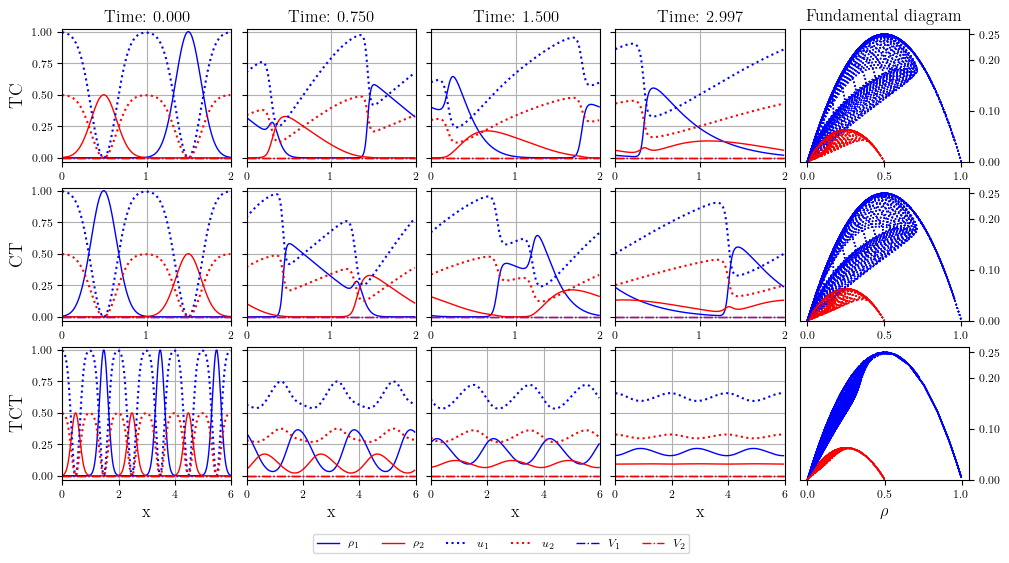

<Figure size 640x480 with 0 Axes>

In [18]:
ln=3; col=4
fig, axs = plt.subplots(ln, col+1, figsize=set_size('elsevier',fraction=2.0))
labels=[r"$\rho_1$",r'$\rho_2$',r'$u_1$',r'$u_2$',r'$V_1$',r'$V_2$']
for i in range(ln):
    for j in range(col):
        Nt=Nt_list[i]; t_mfg=t_mfg_list[i]; f_name=f_name_list[i]
        dat1 =[f for f in f_name]
        if j==col-1: nt=Nt-1
        else: nt=int(j*Nt/col)
        
        x=dat1[0]
        y=dat1[1]
        ro1=dat1[2][:,nt]
        ro2=dat1[3][:,nt]
        u1=dat1[4][:,nt]
        u2=dat1[5][:,nt]
        V1=dat1[6][:,nt]
        V2=dat1[7][:,nt]
        Q1=dat1[8][:,nt]
        Q2=dat1[9][:,nt]

        axs[i, j].plot(y,ro1,color='blue',label=r"$\rho_1$",linewidth=1.0,linestyle='solid')  # linestyle='solid','dotted'
        axs[i, j].plot(y,ro2,color='red',label=r'$\rho_2$',linewidth=1.0,linestyle='solid')
        axs[i, j].plot(y,u1,color='blue',label=r'$u_1$',linewidth=1.5,linestyle=':')
        axs[i, j].plot(y,u2,color='red',label=r'$u_2$',linewidth=1.5,linestyle=':')
        axs[i, j].plot(x,V1,color='blue',label=r'$V_1$',linewidth=1.0,linestyle='-.')
        axs[i, j].plot(x,V2,color='red',label=r'$V_2$',linewidth=1.0,linestyle='-.')
        axs[i, j].set_ylim(ymin=-0.03, ymax=1.02)
        axs[i, j].grid()
        if i==0: 
            axs[i, j].set_title(f"Time: {t_mfg[nt]:.3f}")
            #axs[i, j].set_xticklabels([])#set_xticks([])
        if i==ln-1: 
            axs[i, j].set_xlabel("x", fontsize = 12)
            #axs[i, j].tick_params(axis='x', rotation=45)
            axs[i, j].set_xlim(xmin=0.0, xmax=6.0)
        else: 
            axs[i, j].set_xlim(xmin=0.0, xmax=2.0)
            axs[i, j].set_xticks([0,1,2])
        if j!=0: axs[i, j].set_yticklabels([])#.set_yticks([])
        plt.subplots_adjust(wspace=0.09, hspace=0.2)
            
        for k in range(30):
            nt=int(k*Nt/30)
            ro1=dat1[2][:,nt]
            ro2=dat1[3][:,nt]
            Q1=dat1[8][:,nt]
            Q2=dat1[9][:,nt]
            axs[i, col].plot(ro1,Q1,color='blue',label='Cars',linewidth=1.0,linestyle='dotted')  # linestyle='solid','dotted'
            axs[i, col].plot(ro2,Q2,color='red',label='Trucks',linewidth=1.0,linestyle='dotted')
            axs[i, col].yaxis.set_ticks_position('right')
            axs[i, col].set_ylim(ymin=0.0, ymax=0.26)
            axs[i, col].set_xticks([0,0.5,1])
            axs[i, col].set_yticks([0,0.1,0.2,0.25])
            
            #if i!=ln-1: axs[i, col].set_xticklabels([])#set_xticks([])
        axs[0, col].set_title("Fundamental diagram")
        
axs[ln-1, col].set_xlabel(r'$\rho$', fontsize = 12)
axs[0, 0].set_ylabel("TC", fontsize= 13)
axs[1, 0].set_ylabel("CT", fontsize = 13)
axs[2, 0].set_ylabel("TCT", fontsize = 13)
#plt.xticks(rotation = 45)
fig.legend(labels=labels, loc='lower center', bbox_to_anchor=(0.5, -0.025), ncol=8,) #center right

plt.show()
#fig.savefig("./fig_2class_LWR.pdf", dpi=300, bbox_inches='tight')
#fig.savefig("./fig_2class_LWR.png", dpi=300, bbox_inches='tight')
plt.clf()